# **Cluster Map**

Korelasyona göre birbirleri arasında en iyi ilişkisi olan featurelardan başlayarak featureları kümeleme yöntemidir.

Bir threshold koyulmazsa tüm featurelar kümelenir.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pd.read_csv('/content/drive/MyDrive/data/iris.csv') 

In [3]:
data = data.drop(['Id'],axis=1) #görselleştirmede gerek olmadığı için id sütunu datadan çıkartılır.
                                #axis=1 demek yukarıdan aşağı yani sütun drop et demektir.

In [4]:
df = data.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]] #featurelar seçilir.
df1 = data.Species  #türler seçilir.

In [6]:
x = dict(zip(df1.unique(),"rgb")) #dataframede unique türler belirlenip, ziplenip dictionary'e çevrilir.
x                                 #tür isimleri key değerleridir, bu keylere sırasıyla rgb valueları atanır.
                                  #r -> red, g -> green, b -> blue

{'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}

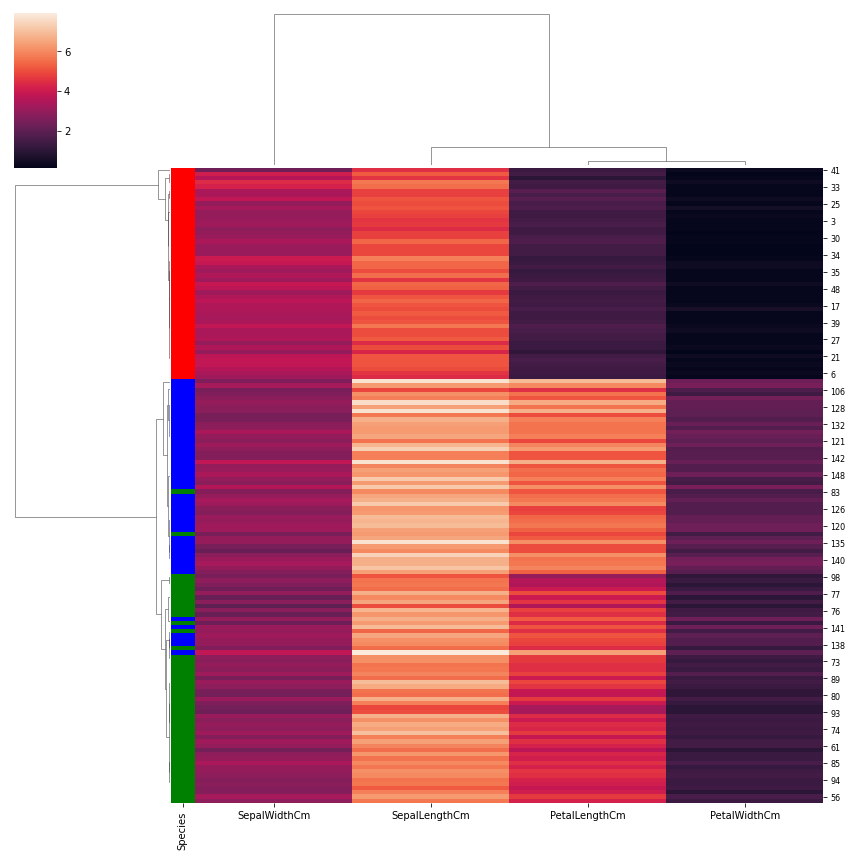

In [5]:
row_colors = df1.map(x) #rgb colorları ortaya çıkartılır.
cg = sns.clustermap(df,row_colors=row_colors,figsize=(12, 12),metric="correlation") 
#df -> featurelardır.
#row colors red, green, bluedur.
#metric=corelation featureların aralarındaki korelasyon ilişkisine göre kümeleme yapılır.
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0,size =8)
plt.show()

In [7]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Featurelara göre birbiri arasında ilişki olan PetalLengthCm ve PetalWidthCm'dir. Corelation map'ten de anlaşılır.

Daha sonrasında SepalLengthCm'dir. Bu durumdan SepalLengthCm'in PetalLengthCm ve PetalWidthCm ile doğru orantılı olması beklenir. Corelation map incelendiğinde iki featurela da doğru orantılı olduğu görülür.

En sonda SepalWidthCm ile kümelenir. Bu feature ile diğer featurelar arasında doğru orantı yoktur. Ancak sonuna kadar kümeleme yapıldığı için bu featurela da kümelenir. 

Buraya bir threshold koyulursa son kümeleme olmayacaktır.

Sol tarafta görülen kümelenmeler, featureların valuelarının kendi arasında kümelenmesidir.